In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('csv/results.csv')

In [12]:
data = data.rename(index={0:'POGZ.fasta', 1:'H2B.fasta', 2:'H2A.fasta', 3:'H3.fasta', 4:'H4.fasta'})
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
POGZ.fasta,1.020000e-11,2.000000e-03,1.480000e-24,1.100000e-01,0.000000e+00,1.200000,0.000000e+00,1.600000e+00,2.000000e-02,1.470000e-11,0.000000e+00
H2B.fasta,3.310000e-45,3.580000e-46,1.270000e-43,1.220000e-21,0.000000e+00,1.200000,0.000000e+00,1.740000e-07,4.940000e-09,9.520000e-46,0.000000e+00
H2A.fasta,1.280000e-22,2.700000e-20,7.970000e-22,4.400000e-01,4.480000e-80,0.630000,1.630000e-26,2.200000e+00,5.300000e+00,1.750000e-22,1.240000e-26
H3.fasta,2.720000e-45,2.810000e-46,9.690000e-44,2.160000e-25,0.000000e+00,1.800000,0.000000e+00,8.150000e-09,6.650000e-12,7.330000e-46,0.000000e+00
H4.fasta,6.150000e-68,1.960000e-45,8.020000e-68,1.300000e+00,1.090000e-67,0.000082,7.600000e-68,3.310000e-05,6.900000e-02,1.080000e-52,1.130000e-68


In [13]:
# Упорядочиваем
data = data[['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', 'ciliate', 'yeast', 
                     'methanocaldococcus', 'thermococcus', 'e.coli', 'tuberculosis']]
data

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
POGZ.fasta,0.000000e+00,0.000000e+00,0.000000e+00,1.480000e-24,1.020000e-11,2.000000e-03,1.470000e-11,1.200000,1.600000e+00,1.100000e-01,2.000000e-02
H2B.fasta,0.000000e+00,0.000000e+00,0.000000e+00,1.270000e-43,3.310000e-45,3.580000e-46,9.520000e-46,1.200000,1.740000e-07,1.220000e-21,4.940000e-09
H2A.fasta,4.480000e-80,1.630000e-26,1.240000e-26,7.970000e-22,1.280000e-22,2.700000e-20,1.750000e-22,0.630000,2.200000e+00,4.400000e-01,5.300000e+00
H3.fasta,0.000000e+00,0.000000e+00,0.000000e+00,9.690000e-44,2.720000e-45,2.810000e-46,7.330000e-46,1.800000,8.150000e-09,2.160000e-25,6.650000e-12
H4.fasta,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,0.000082,3.310000e-05,1.300000e+00,6.900000e-02


In [14]:
# Заменяем нули на маленькое число и числа больше 300 на 300
for column_name in data.columns:
    data.loc[data[column_name] < 1e-300, column_name] = 1e-300
    data.loc[data[column_name] > 300, column_name] = 300
data

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
POGZ.fasta,1.000000e-300,1.000000e-300,1.000000e-300,1.480000e-24,1.020000e-11,2.000000e-03,1.470000e-11,1.200000,1.600000e+00,1.100000e-01,2.000000e-02
H2B.fasta,1.000000e-300,1.000000e-300,1.000000e-300,1.270000e-43,3.310000e-45,3.580000e-46,9.520000e-46,1.200000,1.740000e-07,1.220000e-21,4.940000e-09
H2A.fasta,4.480000e-80,1.630000e-26,1.240000e-26,7.970000e-22,1.280000e-22,2.700000e-20,1.750000e-22,0.630000,2.200000e+00,4.400000e-01,5.300000e+00
H3.fasta,1.000000e-300,1.000000e-300,1.000000e-300,9.690000e-44,2.720000e-45,2.810000e-46,7.330000e-46,1.800000,8.150000e-09,2.160000e-25,6.650000e-12
H4.fasta,1.090000e-67,7.600000e-68,1.130000e-68,8.020000e-68,6.150000e-68,1.960000e-45,1.080000e-52,0.000082,3.310000e-05,1.300000e+00,6.900000e-02


In [15]:
# Считаем логарифм
data = data.transform(lambda x: -np.log10(x))
data

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
POGZ.fasta,300.000000,300.000000,300.000000,23.829738,10.991400,2.698970,10.832683,-0.079181,-0.204120,0.958607,1.698970
H2B.fasta,300.000000,300.000000,300.000000,42.896196,44.480172,45.446117,45.021363,-0.079181,6.759451,20.913640,8.306273
H2A.fasta,79.348722,25.787812,25.906578,21.098542,21.892790,19.568636,21.756962,0.200659,-0.342423,0.356547,-0.724276
H3.fasta,300.000000,300.000000,300.000000,43.013676,44.565431,45.551294,45.134896,-0.255273,8.088842,24.665546,11.177178
H4.fasta,66.962574,67.119186,67.946922,67.095826,67.211125,44.707744,51.966576,4.085128,4.480172,-0.113943,1.161151


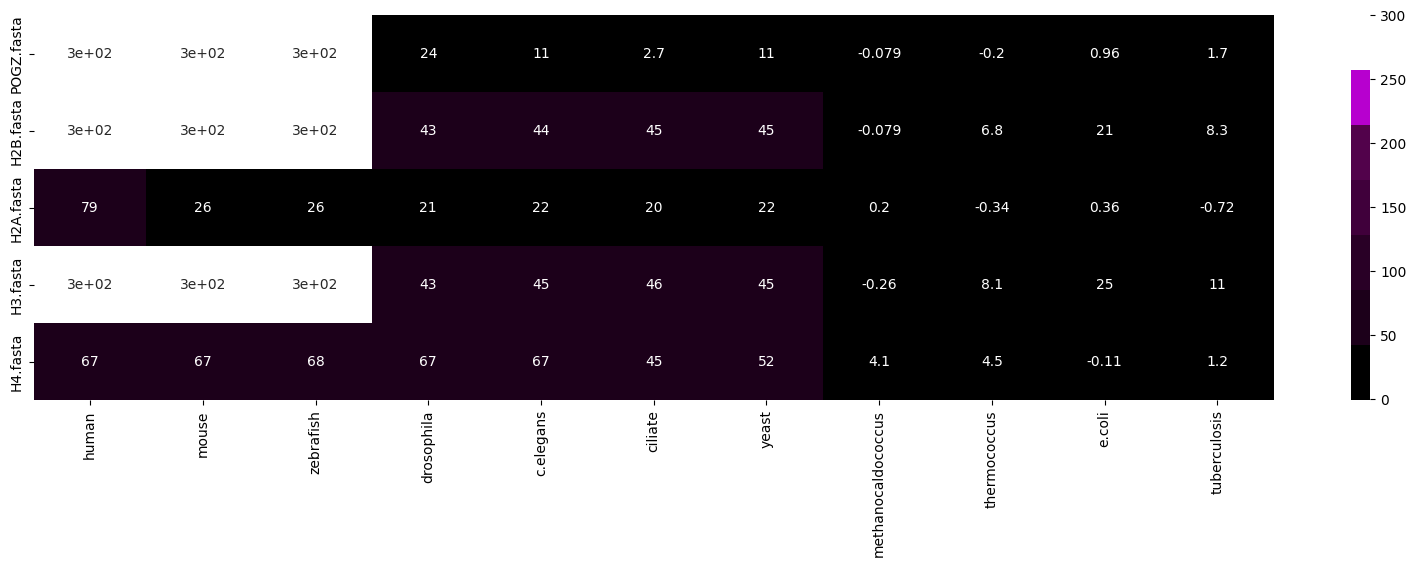

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим хитмапу
f, ax = plt.subplots(figsize=(20,5))
colors = ['#000000','#1c001a','#290026','#40003b','#52024b','#b700cf','#ffffff']
ax = sns.heatmap(data, cmap=сolors, annot=data)
ax.set_yticklabels(data.index.values)
plt.show()

In [17]:
# Считаем количество хитов
data_hits = pd.read_csv('csv/hits.csv')
data_hits = data_hits.rename(index={0:'POGZ.fasta', 1:'H2B.fasta', 2:'H2A.fasta', 3:'H3.fasta', 4:'H4.fasta'})
data_hits.drop(columns=['Unnamed: 0'], inplace=True)
data_hits

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
POGZ.fasta,226,23,1022,6,1799,6,1940,4,2,37,1764
H2B.fasta,25,14,57,5,150,5,120,6,9,7,120
H2A.fasta,24,7,24,10,100,9,64,6,3,8,45
H3.fasta,28,16,29,5,147,3,112,8,7,7,93
H4.fasta,16,9,38,6,54,10,43,9,10,7,37


In [18]:
# Упорядочиваем
data_hits = data_hits[['human', 'mouse', 'zebrafish', 'drosophila', 'c.elegans', 'ciliate', 'yeast', 
                     'methanocaldococcus', 'thermococcus', 'e.coli', 'tuberculosis']]
data_hits

,human,mouse,zebrafish,drosophila,c.elegans,ciliate,yeast,methanocaldococcus,thermococcus,e.coli,tuberculosis
POGZ.fasta,1799,1940,1764,1022,226,23,37,6,4,6,2
H2B.fasta,150,120,120,57,25,14,7,5,6,5,9
H2A.fasta,100,64,45,24,24,7,8,9,6,10,3
H3.fasta,147,112,93,29,28,16,7,3,8,5,7
H4.fasta,54,43,37,38,16,9,7,10,9,6,10
